# Task 2

---

### Predictive modeling of customer bookings
Initial exploration of the data is essential to gain a deeper understanding of the dataset, its components, and its statistical characteristics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
CB = pd.read_csv(r"C:\Users\manoj\OneDrive - Zoro\Desktop\Project\British Airways\customer_booking.csv", encoding='latin-1')
CB.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
CB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
# Exploratory Data Analysis
# Checking for datatypes
def explore_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("\nShape:")
    print(df.shape)
    print("\nNull Values:")
    print(df.isnull().sum())
    print("\nValue Counts for 'booking_complete':")
    print(df.booking_complete.value_counts())
    print("\nDescriptive Statistics:")
    print(df.describe())

explore_data(CB)

Data Types:
num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

Shape:
(50000, 14)

Null Values:
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Value Counts for 'booking_complete':
booking_complete
0    42522
1     7478
Name: coun

By utilizing the `.describe()` method, we obtain a concise summary of descriptive statistics across the entire dataset, applicable solely to numerical columns. This summary provides a swift overview of key attributes such as mean, minimum, maximum, and the overall distribution within each column.

Subsequent to this, your exploration of the dataset should progress with the inclusion of visualizations and pertinent metrics that offer valuable insights. Following this exploratory phase, the dataset should be prepared to facilitate predictive modeling. Subsequently, the machine learning model ought to be trained, followed by performance evaluation using appropriate metrics and the creation of visual representations for significant variables. All of these analyses should be synthesized into a single slide to provide a comprehensive overview.

In [5]:
# Mutual Information
X = CB.drop('booking_complete', axis=1)
y = CB.booking_complete

In [6]:
# Changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [7]:
# Calculate Mutual Information scores
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

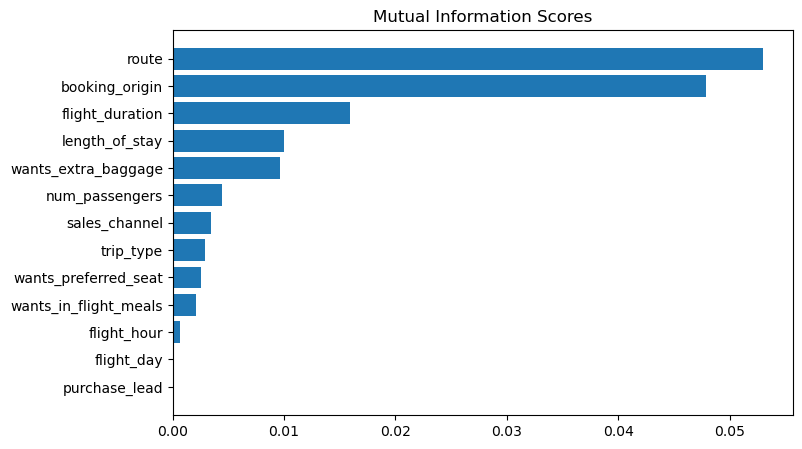

In [8]:
# Plot Mutual Information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(dpi=100, figsize=(8, 5))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

plot_mi_scores(mi_scores)

In [9]:
# Dataset Split
def dataset_split(X, y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)
    return train_X, val_X, train_y, val_y

In [10]:
# Scaling
def scale_features(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [11]:
# Apply dataset split and scaling
train_X, val_X, train_y, val_y = dataset_split(X, y)
train_X_scaled = scale_features(train_X)
val_X_scaled = scale_features(val_X)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [13]:
classifiers = {
    'RandomForest': (RandomForestClassifier(),{'n_estimators':[50, 100, 200],
                                               'max_depth': [None, 10, 20],
                                               'min_samples_split':[2, 5, 10],
                                               'min_samples_leaf':[1, 3, 4]}),
    
    'GradientBoosting':(GradientBoostingClassifier(),
                       {'n_estimators':[50, 100, 200],'max_depth':[3, 4, 5],
                       'learning_rate':[0.01, 0.1, 0.2]}),
    
    'SVC': (SVC(),{'C': [0.1, 1, 10], 'kernel':['linear', 'rbf', 'poly'],
                  'gamma':['scale', 'auto']}),
    
    'LogisticRegression':(LogisticRegression(),{'penalty': ['l2', 'l1', 'none'], 'C': [0.1, 1.0, 10.0],
                                                'solver': ['lbfgs', 'saga'],'l1_ratio': [0.1, 0.5, 0.9]}),
    
    'DecisionTree': (DecisionTreeClassifier(),{'max_depth':[None, 10, 20],
                                                'min_samples_split':[2, 5, 10],
                                                'min_samples_leaf':[1, 2, 4]}),
    
    'KNeighbors': (KNeighborsClassifier(),{'n_neighbors':[3, 5, 7],
                                           'weights':['uniform', 'distance']}),
    
    'AdaBoost': (AdaBoostClassifier(),{'n_estimators':[50, 100, 200],
                                       'learning_rate':[0.01, 0.1, 0.2]}),
    
    'GaussianNB': (GaussianNB(),{}),
    
    'MLPClassifier': (MLPClassifier(),{'hidden_layer_sizes':[(50,), (100,), (50,50)],
                                       'activation':['tanh', 'relu'],  'alpha':[0.0001, 0.001, 0.01]}),
    }

best_models = {}

In [14]:
best_models = {}  # Initialize as an empty dictionary

for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Training {clf_name}...")
    
    grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(train_X_scaled, train_y)
    
    best_models[clf_name] = grid_search.best_estimator_
    print(f"Best parameters for {clf_name}:  {grid_search.best_params_}")
    print(f"Best score for {clf_name}: {grid_search.best_score_}")
    
best_score = 0
best_model = None

for clf_name, model in best_models.items():
    accuracy = model.score(val_X_scaled, val_y)
    print(f"{clf_name} Accuracy: {accuracy:.4f}")
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = model
        
print(f"Best Model: {best_model.__class__.__name__} with Accuracy: {best_score:.4f}")


Training RandomForest...
Best parameters for RandomForest:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score for RandomForest: 0.8526666666666666
Training GradientBoosting...
Best parameters for GradientBoosting:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score for GradientBoosting: 0.8521666666666666
Training SVC...
Best parameters for SVC:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score for SVC: 0.8515333333333334
Training LogisticRegression...
Best parameters for LogisticRegression:  {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for LogisticRegression: 0.8515333333333334
Training DecisionTree...
Best parameters for DecisionTree:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score for DecisionTree: 0.8373666666666666
Training KNeighbors...
Best parameters for KNeighbors:  {'n_neighbors': 7, 'weights': 'uniform'}
Best score for KNeighbors: 0.83833